<a href="https://colab.research.google.com/github/100485446-UC3M/Primera_Practica_Machine_Learning_Grupo16/blob/main/Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Práctica 1
## Esteban Gómez Buitrago 100485446
## Nicolás Alejandro Cuesta García 100495966
## Grupo 16

## Análisis Exploratorio de Datos

PAra realizar este projecto utilizamos los set de datos "attrition_availabledata_10.csv" y"attrition_competition_10.csv". Decidimos utilizar estos, después de realizar la suma de los últimos dos digitos del NIA 100485446 (4 + 6 = 10).

Al analizar los datos, la primera conclusión a la que se puede llegar es que este es un problema de clasificación. Se está realizando un estudio en el cual a través de algunas variables se va a definir si la clase (en este caso, el attributo "Attrition") es "Yes" o "No".

Para encontrar ciertos datos importantes para continuar con el análisis, será necesario utilizar ciertas funciones de python. El código y los resultados están descritos a continuación:

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
#Las librerías necesarias son importadas
import pandas as pd

In [ ]:
#Se lee el fichero de datos
data = pd.read_csv('attrition_availabledata_10.csv.gz')

#Para chequear que sea el set de datos correcto
#print(data.head())

print(f"Número de variables (columnas): {data.shape[1] - 1}")
print(f"Número de instancias (filas): {data.shape[0]}")
valoresvacios = data.isnull().sum()
print("Valores vacíos por columna:\n", valoresvacios.to_dict())
print(f"Número total de valores vacíos: {data.isnull().sum().sum()}")

#Las columnas de tipo object son las categóricas
categorical_cols = data.select_dtypes(include=['object'])
unique_counts = categorical_cols.nunique()
print("\nNúmero de categorías por variable categórica:\n", unique_counts.to_dict())
constant_columns = data.columns[data.nunique() == 1].tolist()
print("\nColumnas constantes:\n", constant_columns)
id_cols = data.columns[data.nunique() == data.shape[0]]
print("Columnas de ID:\n", id_cols)

num_yes = data["Attrition"].eq("Yes").sum()
num_no = data["Attrition"].eq("No").sum()
Total_attrition = num_no + num_yes
if Total_attrition == data.shape[0]:
  print(f"\nNúmero de empleados que dejaron la empresa (Attrition = Yes): {num_yes}")
  print(f"Número de empleados que no dejaron la empresa (Attrition = No): {num_no}")
else:
  print("Error en el número de instancias, hay valores no reconocidos")


Número de variables (columnas): 30
Número de instancias (filas): 2940
Valores vacíos por columna:
 {'hrs': 0, 'absences': 0, 'JobInvolvement': 0, 'PerformanceRating': 0, 'EnvironmentSatisfaction': 15, 'JobSatisfaction': 12, 'WorkLifeBalance': 29, 'Age': 0, 'BusinessTravel': 0, 'Department': 0, 'DistanceFromHome': 0, 'Education': 0, 'EducationField': 0, 'EmployeeCount': 0, 'EmployeeID': 0, 'Gender': 0, 'JobLevel': 0, 'JobRole': 0, 'MaritalStatus': 0, 'MonthlyIncome': 0, 'NumCompaniesWorked': 17, 'Over18': 0, 'PercentSalaryHike': 0, 'StandardHours': 0, 'StockOptionLevel': 0, 'TotalWorkingYears': 5, 'TrainingTimesLastYear': 0, 'YearsAtCompany': 0, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 0, 'Attrition': 0}
Número total de valores vacíos: 78

Número de categorías por variable categórica:
 {'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'Attrition': 2}

Columnas constantes:
 ['EmployeeCount', 'Over18', 'Sta

El estudio será realizado con 30 variables y 2940 instancias distintas. Es importante resaltar que al número de variables se le resto la variable "Attrition" ya que esta es nuestra variable de calisifcación (objetivo). Después de analizar las variable individualmente encontramos que tenemos variables catégoricas, ordinales y númericas.

Las variabes **catégoricas** son (7):   

*   BusinessTravel
*   Department
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   Over18

Las **númericas** incluyen (15):  

*   hrs
*   absences
*   Age
*   DistanceFromHome
*   MonthlyIncome
*   PercentSalaryHike
*   TotalWorkingYears
*   TrainingTimesLastYear
*   NumCompaniesWorked
*   EmployeeCount
*   EmployeeID
*   StandardHours
*   YearsAtCompany
*   YearsSinceLastPromotion
*   YearsWithCurrManager

Finalmente, entre las **ordinales** están (8):

*   JobInvolvement
*   JobLevel
*   Education
*   PerformanceRating
*   EnvironmentalSatisfaction
*   JobSatisfaction
*   WorkLifeBalance
*   StockOptionLevel

Para definir si una variable es de **alta cardinalidad** o no vamos a tomar el límite de **5 categorías**. Tomando este límite podemos ver que **existen 2 variables que tendrían alta cardinalidad**: EducationField (6) y JobRole (9). El resto de variables categóricas tienen 3 o menos categorías cada una, por lo que no tienen una cardinalidad alta.

Asimismo, es pertinente analizar si tenemos variables que tengan el mismo valor en todas las instancia (**columnas constantes**).  Como se puede evidenciar en el código anterior, exite una variable "Over18", que siempre tiene el mismo valor ("Y"). De esta forma se puede concluir que **'Over18', 'EmployeeCount' y 'StandardHours' son una columnas constantes** y no le va a proporciona información útil al modelo, se deberá tratar con ella en el preproceso.

Hay que buscar **columnas de ID** que son columnas que tienen un valor diferente para cada instancia, y pueden servir como identificadores. Con el código encontramos que tenemos una columna que cumple con esta descripción. La variable **"EmployeeID" es una columna de ID**.

Entre todas estas instancias tenemos **78 valores vacíos** dividos en 5 variables: WorkLifeBalance (29),  NumCompaniesWorked: (17), EnvironmentSatisfaction (15), Job Satisfaction (12), y TotalWorkingYears (5). Esto es un factor a tener en cuenta a la hora de realizar el preproceso.

Cómo ya se describió antes, este es un problema de **clasificación**, para  finalizar, es pertinente analizar si está balanceado. La variable "*Attrition*" es nuestro clasificador, esta puede tener el valor de "Yes" o  "No". Para saber si está balanceado se debe ver cuantas intancias existen con cada valor. Como se puede ver en el código expuesto previamente, en este caso exiten 474 instancias que tienen en esta variable el valor de  "Yes" y 2466 que tienen "No". Con esto se puede concluir que el problema **NO está balanceado**, y se tendrá que utilizar una técnica de balanceo durante el preproceso.


## Preproceso Sin Leakage
Durante esta fase se llevarán a cabo 5 tares principales. La primera tarea es remover las columnas constantes o/y ID ya que estas no van a proveer de información útil al modelo. Posteriormente se tratarán los valores vacíos del set de datos.

### Eliminación de Columnas Constantes y de ID.
El primer paso que hay que llevar a cabo es eliminar las columnas constantes y de ID, ya que no van a aportar información al modelo. Esto se puede realizar al momento, ya que no hay peligro de "Data/Information Leakage"

In [ ]:
import numpy as np
import sklearn as sk
#Se crea una semilla para poder replicar los resultado y se leen los datos
np.random.seed(100495966)

#Primero removemos las columnas constantes y de ID.
x = data.drop(columns=["Over18", "EmployeeID", "EmployeeCount", "StandardHours", "Attrition"])
y = data["Attrition"]
y =y.map({'Yes': 1, 'No': 0})

### Codificación de Variables Categóricas
Ahora vamos a codificar las variables c:ategóricas, para esto utilizaremos el método de One-Hot-Encoding.

In [ ]:
onehot_columns = ['BusinessTravel', 'Gender','Department', 'EducationField', 'JobRole', 'MaritalStatus']
x = pd.get_dummies(x, columns=onehot_columns, drop_first=True)
x = x.astype({col: "Int64" for col in x.select_dtypes(include=["bool"]).columns})

print(x.head())
print(f"Numero de columnas: {x.shape[1]}")


        hrs  absences  JobInvolvement  PerformanceRating  \
0  7.462297        13               3                  3   
1  7.488597         6               1                  3   
2  7.116541        16               2                  4   
3  9.709125         6               3                  4   
4  6.297729         6               4                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              3.0              3.0   48   
1                      3.0              4.0              4.0   31   
2                      1.0              1.0              3.0   36   
3                      3.0              3.0              3.0   49   
4                      3.0              2.0              3.0   40   

   DistanceFromHome  Education  ...  JobRole_Human Resources  \
0                12          4  ...                        0   
1                 2          2  ...                        0   
2                14          3  

## Preproceso con Leakage

Durante las siguientes étapas del proceso de preprocesado hay peligro de fuga de datos (data leakage). Es posible que los datos de el set de prueba se filtren al set de entrenamiento. Esto daría incrementaría el desempeño del modelo de forma irreal. Para evitar esto decidimos utilizar el método de pipelines. Estos son los procesos que se van incluir en estas pipelines:

### Evaluación Interna
Vamos a realizar una evaluación interna para determinar cualés son los tipos de normalización y imputación que dan mejor resultado. Durante este proceso separaremos los datos en un grupo de entrenamiento y uno de testeo, para evitar una posible fuga de datos.

#### Imputación
Como ya vimos en la fase de EDA, no existe ninguna variable en la que 80% de los datos esten vaciós, por lo que no removeremos ninguna inmediatamente.

Ahora, revisamos si hay alguna fila que tenga un gran número valores nulos en las variables (si la hay, se eliminará). Consideramos que un buen limite es que 1/3 de las variables esten vacías. Es importante resaltar que solo eliminamos si tienen muchos datos vacíos porque si decidieramos eliminar todas las filas que tienen al menos un valor NA perderíamos muchos datos.

En caso de quedar valores vacíos después de eliminar este tipo de filas, vamos a emplear imputación univaribale. Esto nos va a permitir utilizar dos tipos de imputación, por medio del promedio y del mediano.

In [ ]:
#Revisamos las filas
threshold = (1/3) * data.shape[1]
filas_con_muchos_na = data[data.isna().sum(axis=1) > threshold]
print(f"Filas con más de 30% de sus columnas vacías: {filas_con_muchos_na.shape[0]}")

# Eliminar las filas con más de 30% de valores nulos
data_clean = data.dropna(thresh=threshold)

print("Se han eliminado las filas pertinentes")


Filas con más de 30% de sus columnas vacías: 0
Se han eliminado las filas pertinentes


#### Normalización
En algunos casos hay una diferencia en la magnitud entre variables. Es importante normalizarlas para que todas tengan un efecto similar en el resultado del modelo. En este caso utilizaremos tres posibilidades de escalados: estandarización, robusto y de rango. Estos emplean diferentes funciones para escalar, por lo que se va determinar cuál es la más efectiva.

#### Balanceo de datos
Antes de analizar cuál es la mejor combinación de escalado y imputación, se debe tratar un tema importante. En la fase de EDA, se concluyó que este problema está desbalanceado, es vital balancearlo al dividir los dato en el set de entrenamiento y testeo. Si esto no se hace, el modelo puede empezar a tender a elegir la opción de la que hay más número en el set de entrenamiento sin realmente basarse en las variables. Para tratar el desbalanceo utilizaremos particiones estratificadas.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold as KFolds

# División para la evaluación externa
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=100495966, stratify=y)

# División para evaluación interna (utilizamos esta función porque es desbalanceado)
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=100495966)

interna = {}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer


# Alternativa 1, KNN, RobustScaler y Median Imputer
pipeline_K_R_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_A = cross_validate(pipeline_K_R_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y RobustScaler"] = scores_K_R_A["test_score"].mean()

# Alternativa 2, KNN, StandardScaler y Median Imputer
pipeline_K_S_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_A = cross_validate(pipeline_K_S_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y StandardScaler"] = scores_K_S_A["test_score"].mean()

# Alternativa 3, KNN, MinMaxScaler y Median Imputer
pipeline_K_M_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_A = cross_validate(pipeline_K_M_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y MinMaxScaler"] = scores_K_M_A["test_score"].mean()

# Alternativa 4, KNN, RobustScaler y Mean Imputer
pipeline_K_R_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_B = cross_validate(pipeline_K_R_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y RobustScaler"] = scores_K_R_B["test_score"].mean()

# Alternativa 5, KNN, Standard Scaler y Mean Imputer
pipeline_K_S_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_B = cross_validate(pipeline_K_S_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y StandardScaler"] = scores_K_S_B["test_score"].mean()

# Alternativa 6, KNN, MinMax Scaler y Mean Imputer
pipeline_K_M_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_B = cross_validate(pipeline_K_M_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y MinMaxScaler"] = scores_K_M_B["test_score"].mean()

for name, score in interna.items():
    print(f"{name}: {score}")


KNN con Median Imputer y RobustScaler: 0.5741540476081173
KNN con Median Imputer y StandardScaler: 0.5892546175151877
KNN con Median Imputer y MinMaxScaler: 0.5797891759191857
KNN con Mean Imputer y RobustScaler: 0.5744581838611587
KNN con Mean Imputer y StandardScaler: 0.5892546175151877
KNN con Mean Imputer y MinMaxScaler: 0.5819697754692933


In [ ]:
import time
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
# 1. Definir el pipeline y parámetros de búsqueda para el HPO de KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import time

# Definir los parámetros que quieres optimizar
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],  # Número de vecinos para KNN
    "knn__weights": ['uniform', 'distance'],  # Método de ponderación
    "knn__metric": ['euclidean', 'manhattan', 'chebyshev'],  # Distancia
}

# 3. Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline_K_S_A, param_grid, cv=3, n_jobs=-1, scoring="balanced_accuracy", verbose=3)

# 4. Medir el tiempo de entrenamiento
start_time = time.time()

# Ajustar los hiperparámetros
grid_search.fit(x_train, y_train)

# 5. Calcular el tiempo de entrenamiento
end_time = time.time()
training_time = end_time - start_time

# 6. Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# 7. Obtener el mejor modelo después de HPO
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


### Evaluación Externa
De la evaluación interna realizada se puede concluir que hubo una combinación que fue un poco más acertada que las demás. Esta combinación es una normalización con RobustScaler y una imputación con la mediana. Ahora se realiza la estimación del desempeño con respecto a la variable. Las ,étricas que vamos a utilizar para analizar el desempeño son: balanced accuracy, TPR (accuracy de la clase positiva), TNR (accuracy de la clase negativa) y accuracy. Para facilitar el entendimiento de las métricas utilizaremos una matrix de confusión.

Mejor modelo: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])
Mejor modelo: :
  Accuracy: 0.9377551020408164
  Balanced Accuracy: 0.8836505589947334
  TPR (Sensitivity): 0.8037974683544303
  TNR (Specificity): 0.9635036496350365


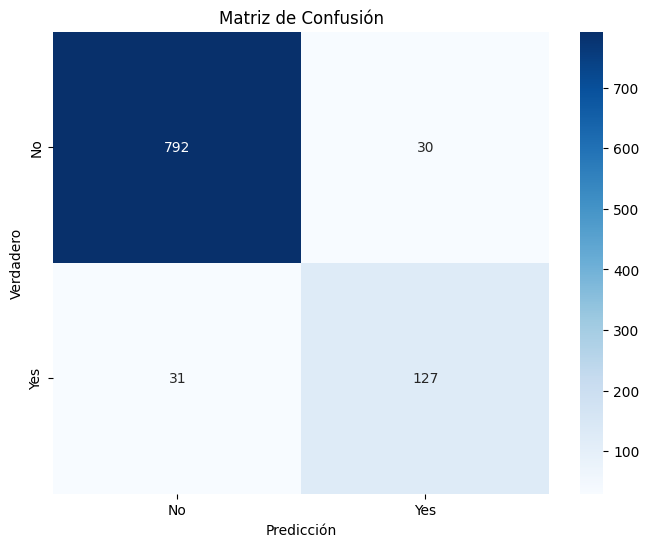

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

#y_pred = cross_val_predict(pipeline_K_M_A, x_train, y_train, cv=inner)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
TPR = TP / (TP + FN)  # Sensitividad (Proporción positivas clasificadas correctamente)
TNR = TN / (TN + FP)  # Especificidad (Proporción clasificadas postivas que si los son)

# Guardar los resultados
metricas= {}

# Imprimir el nombre del mejor modelo y sus hiperparámetros
print(f"Mejor modelo: {grid_search.best_estimator_}")

metricas["Mejor modelo: "] = {
    "Accuracy": accuracy,
    "Balanced Accuracy": balanced_accuracy,
    "TPR (Sensitivity)": TPR,
    "TNR (Specificity)": TNR
}

# Mostrar los resultados
for name, metrics in metricas.items():
    print(f"{name}:")
    if isinstance(metrics, dict):  # Verificamos si el valor es un diccionario
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:  # Si es un valor numérico
        print(f"  Score: {metrics}")

# Dibujar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

## Selección de Atributos
En todo set de datos se espera que existan variables con mayor y menor influencia en el resultado. Antes de realizar alguna evaluación es importante hacer una selección de atributos, ya que pueden existir algunos que no sean útiles para el modelo.

#### Correlación Lineal
En caso de encontrar dos variables que tengan una correlación mayor a 0.75 una de ellas se eliminará, ya que estas proveen practicamente la misma información.

Las Variables PerformanceRating y PercentSalaryHike están extremadamente correladas
Las Variables YearsAtCompany y YearsWithCurrManager están extremadamente correladas
Las Variables BusinessTravel_Travel_Frequently y BusinessTravel_Travel_Rarely están extremadamente correladas
Las Variables Department_Research & Development y Department_Sales están extremadamente correladas
Las columnas removidas por alta correlación (más de 0.75) son:
 {'PerformanceRating', 'YearsAtCompany', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development'}
Numero de columnas: 36

Correlación entre variables (Después de eliminar las más correladas):



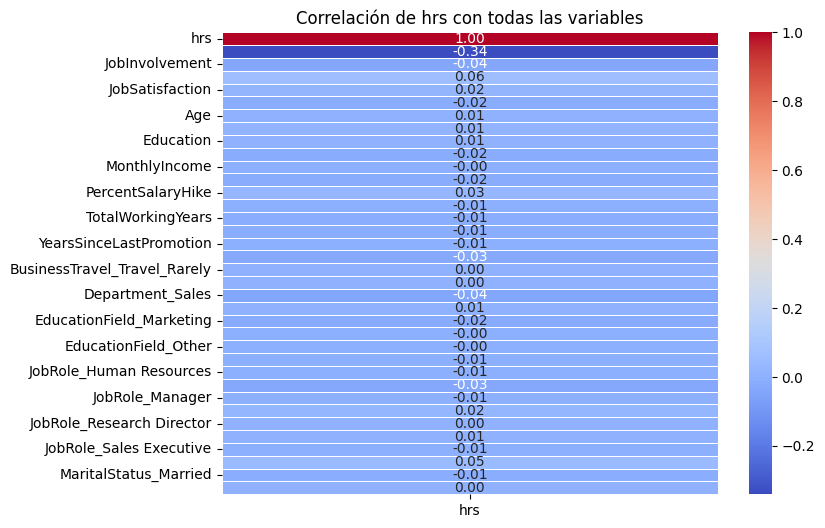

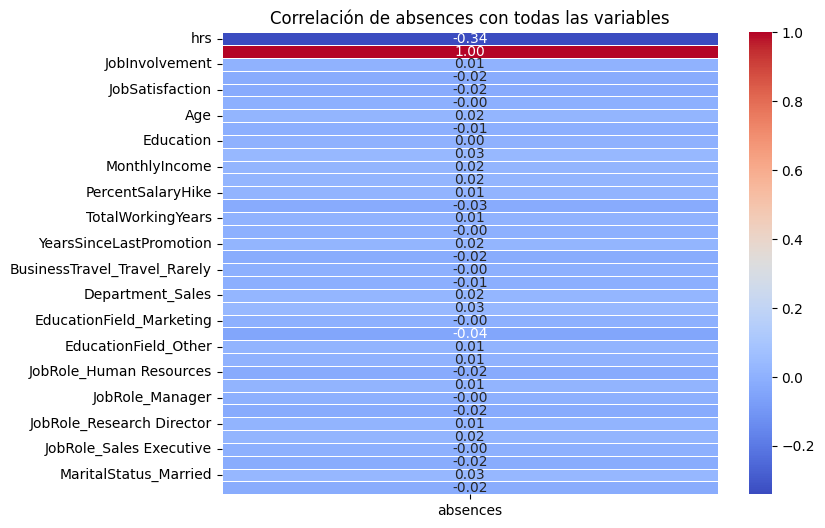

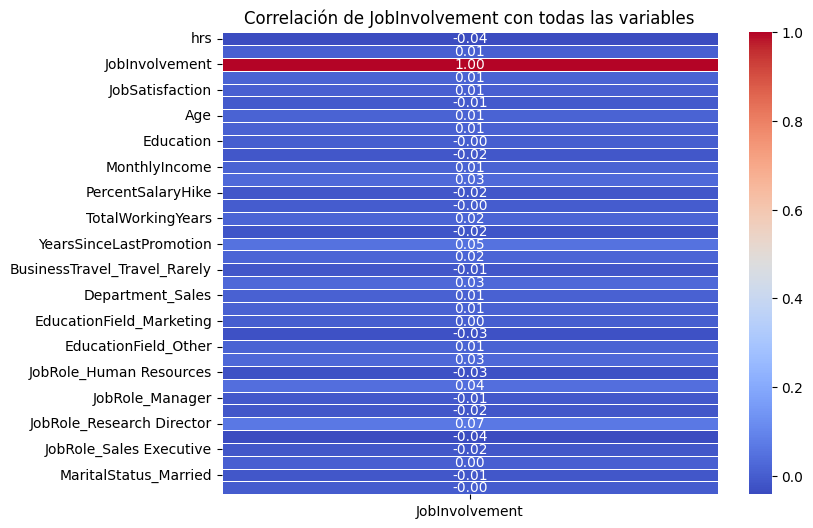

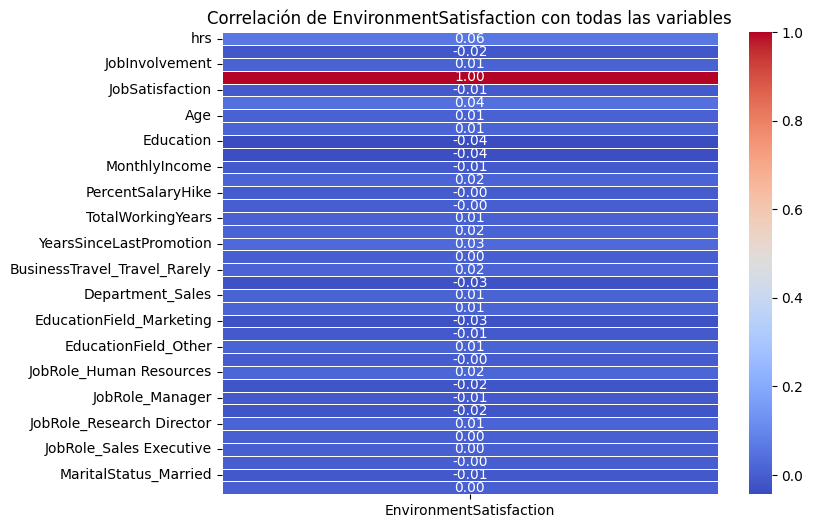

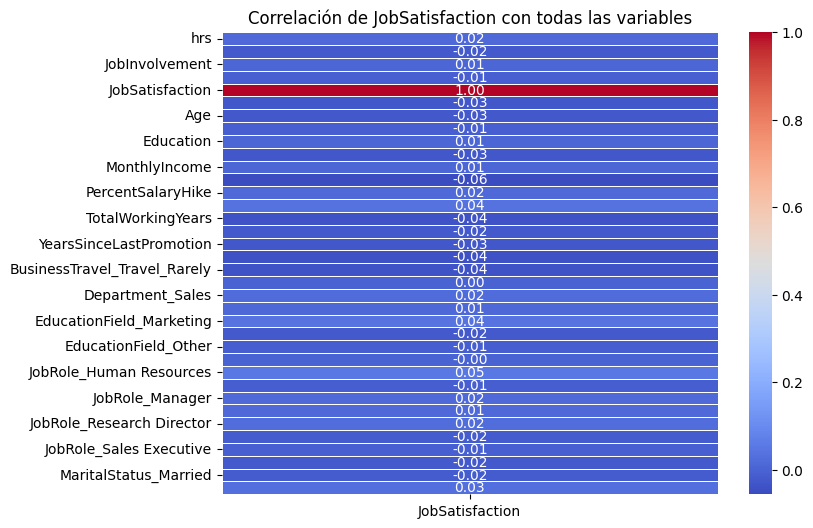

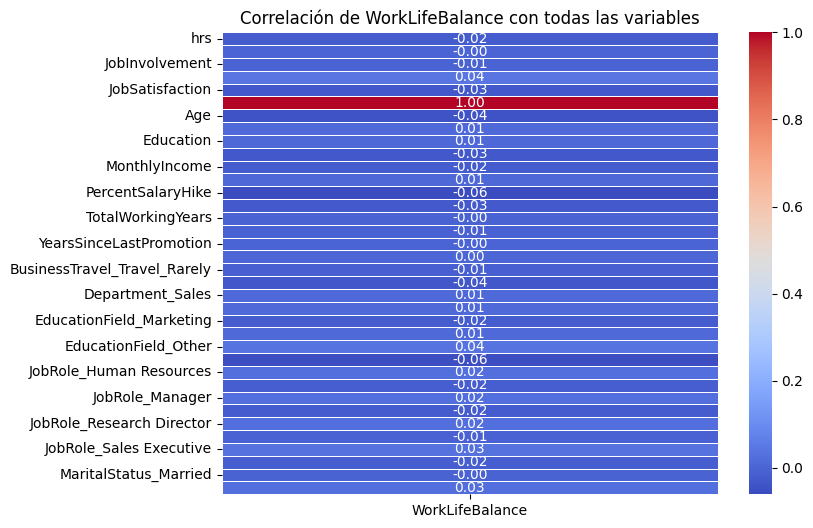

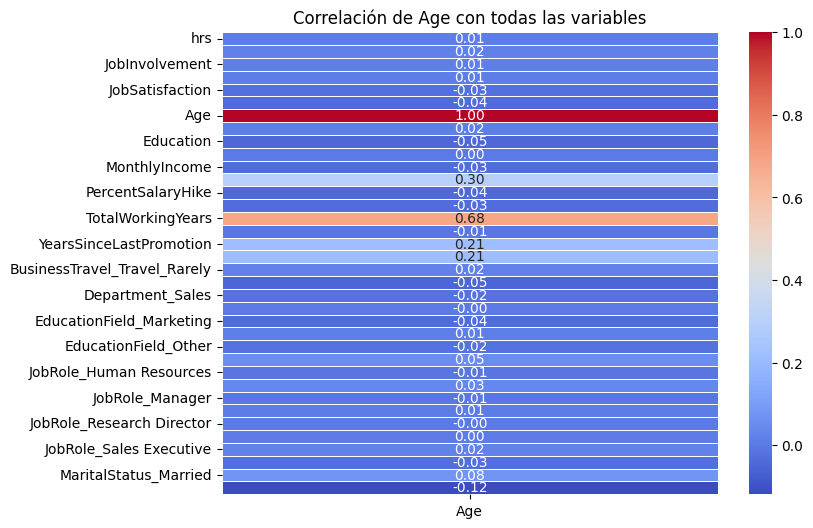

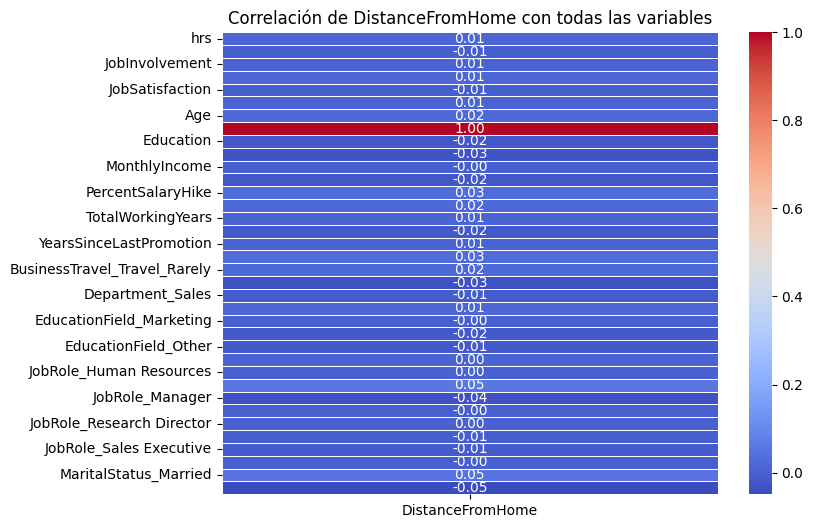

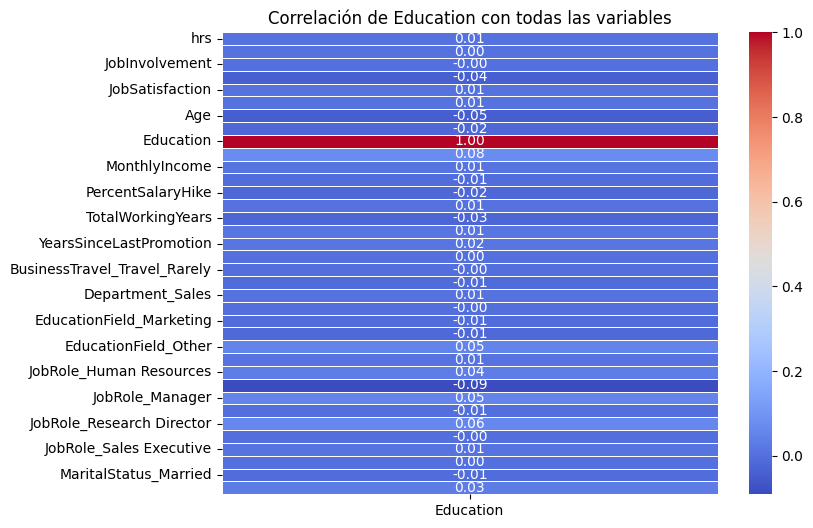

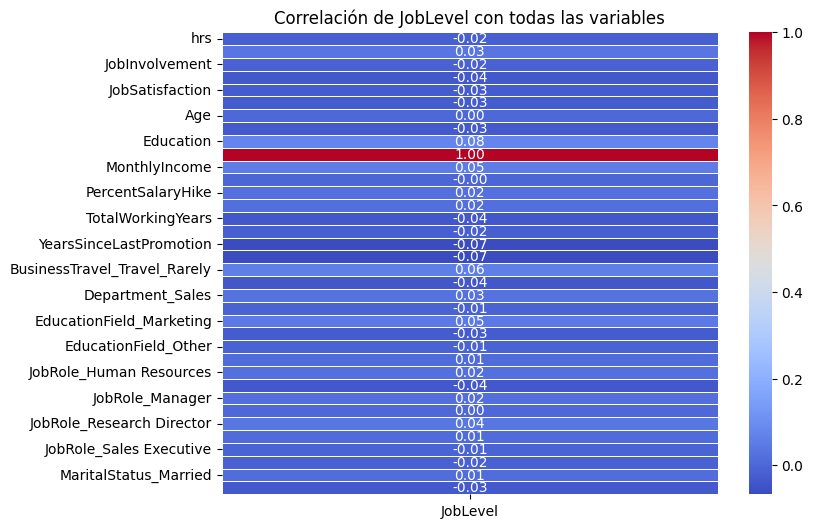

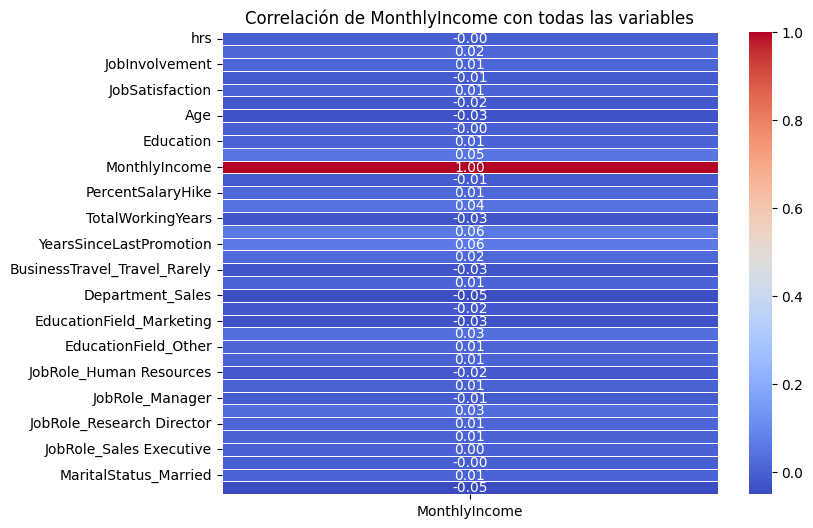

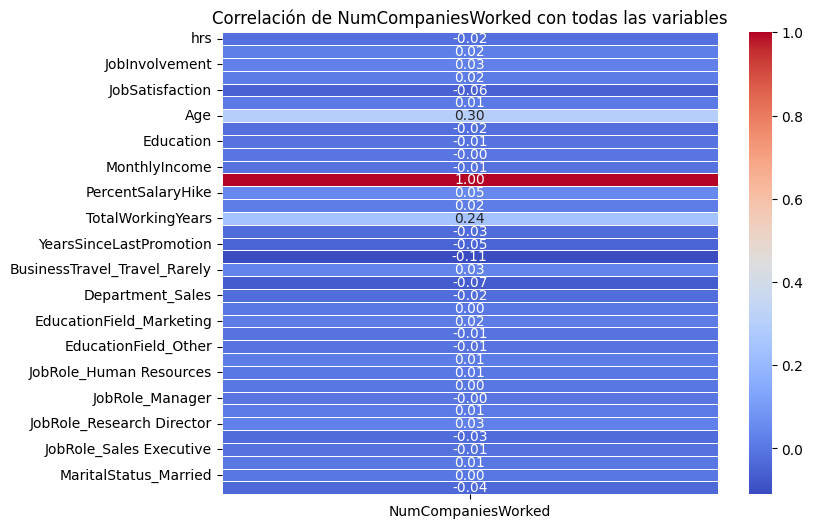

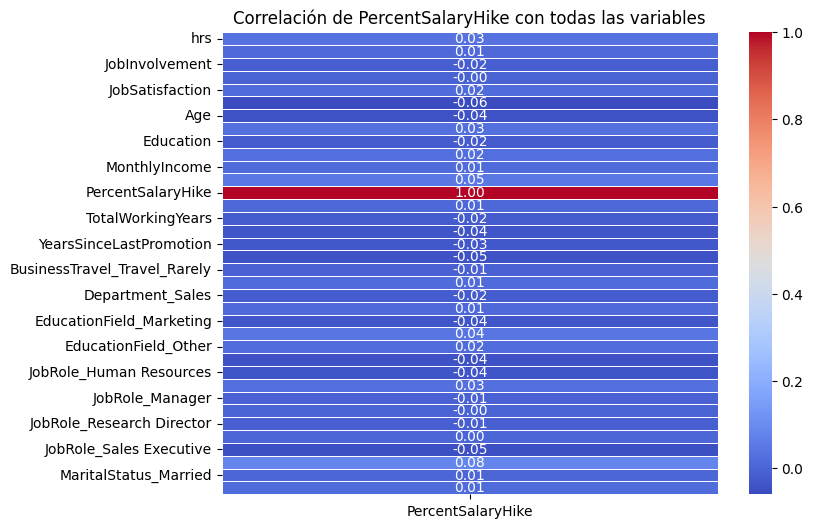

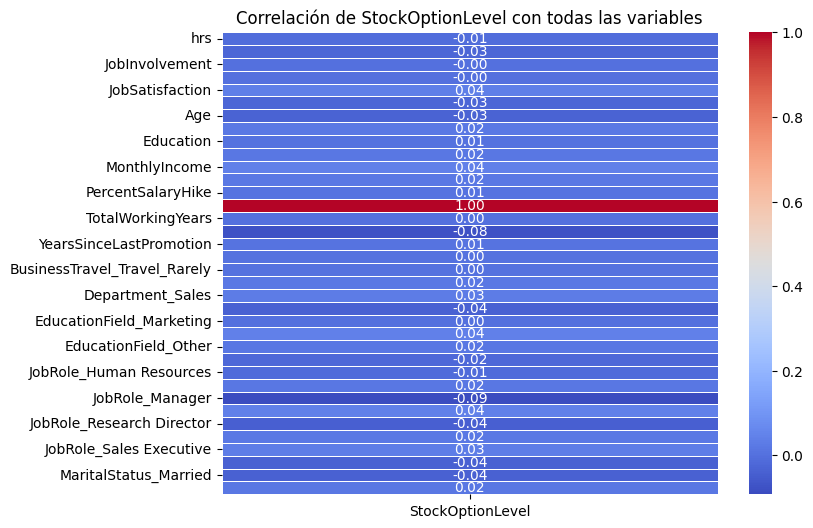

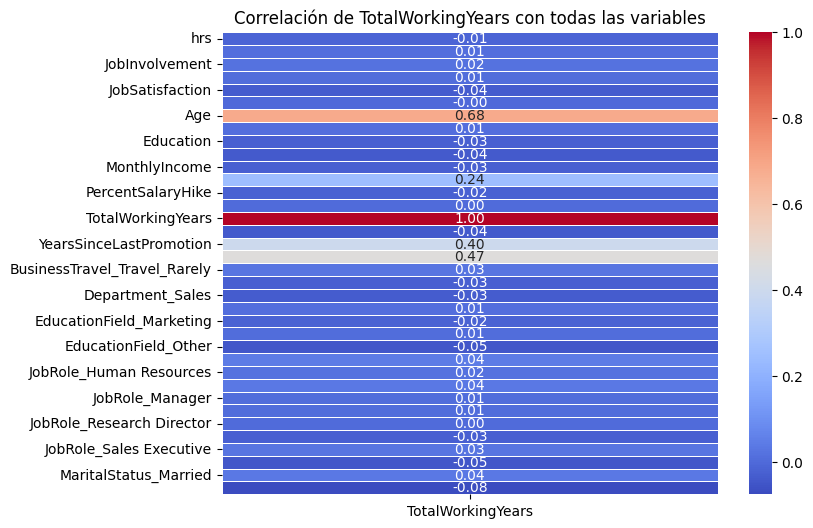

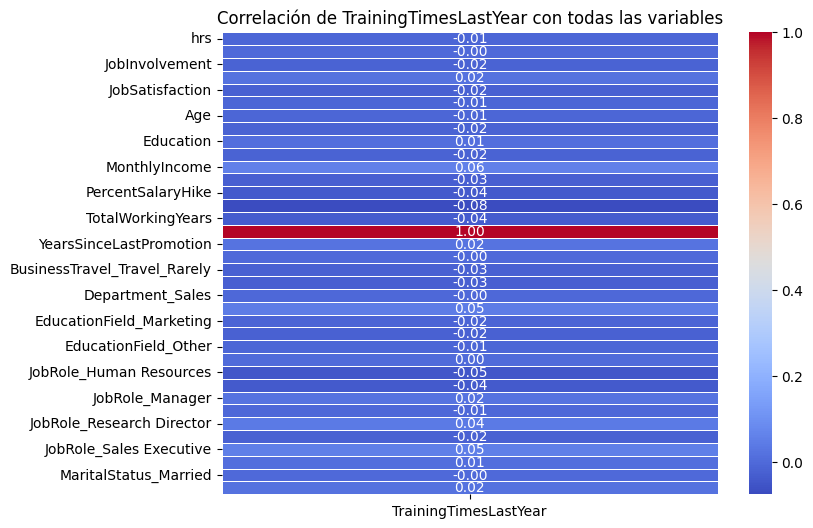

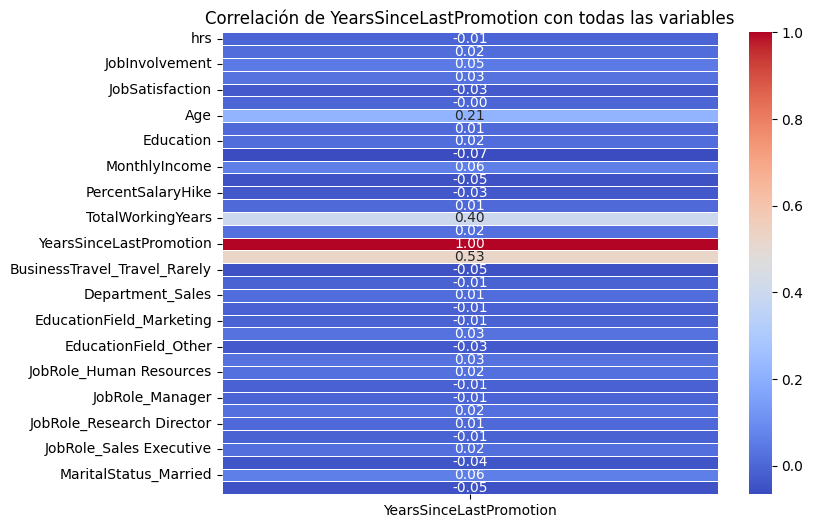

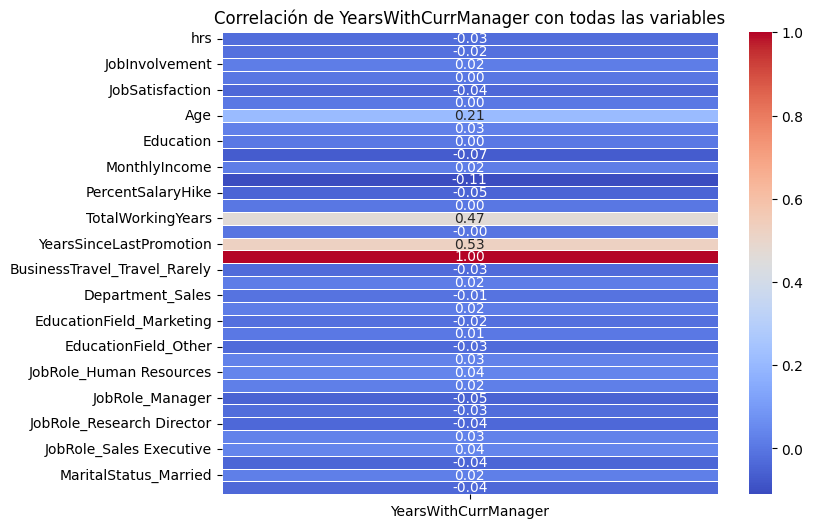

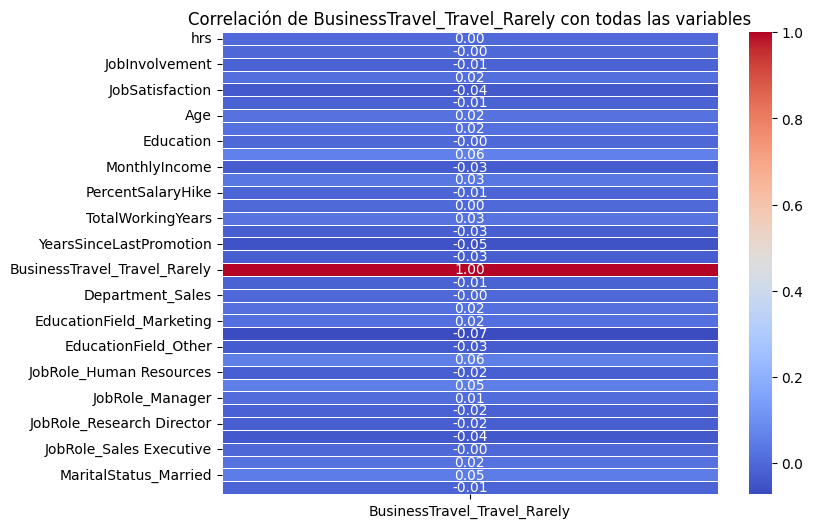

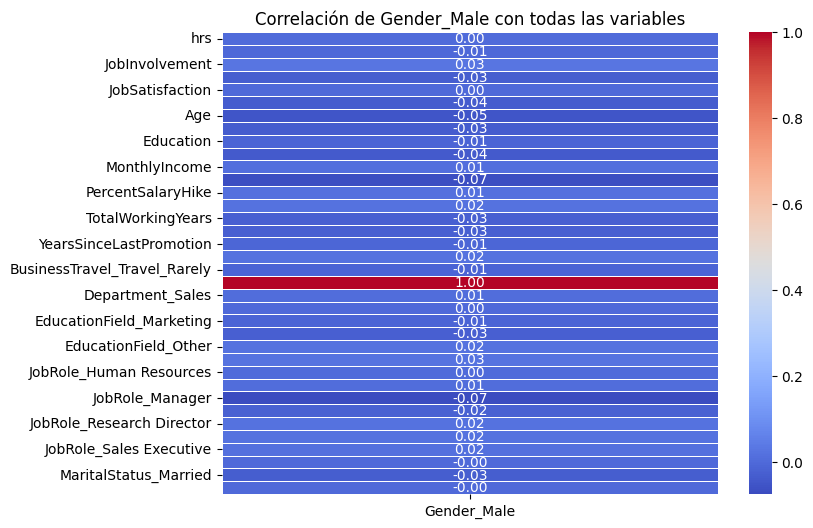

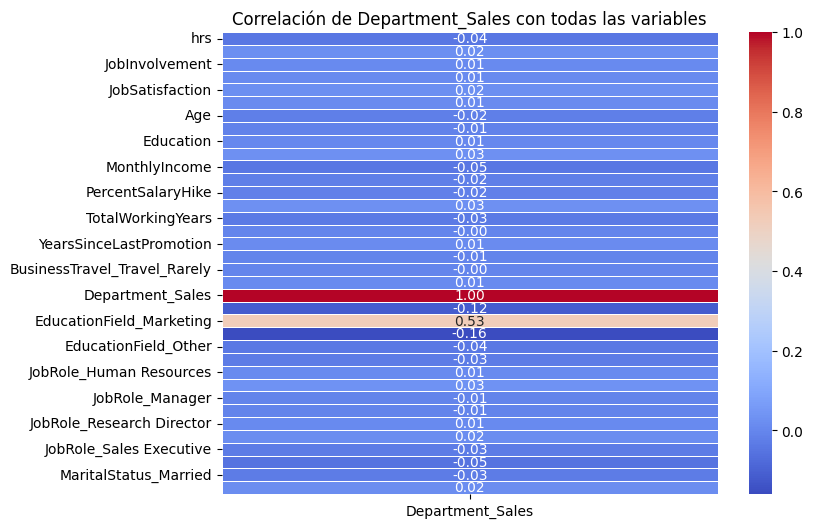

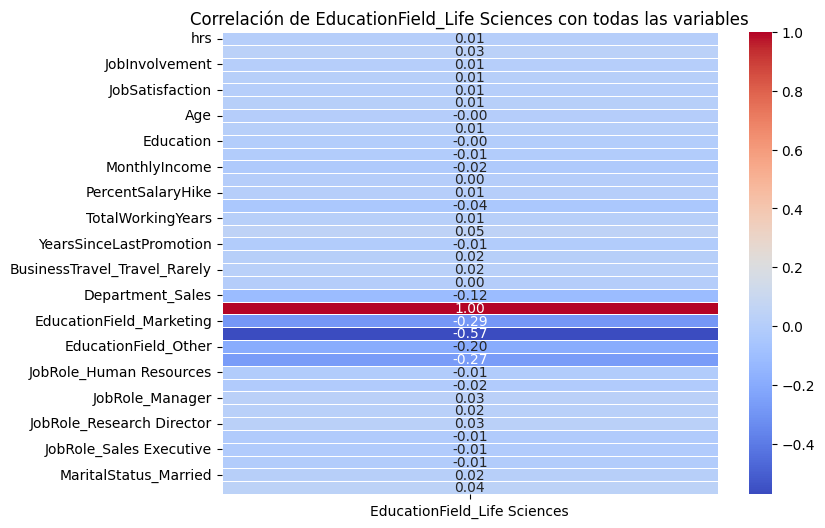

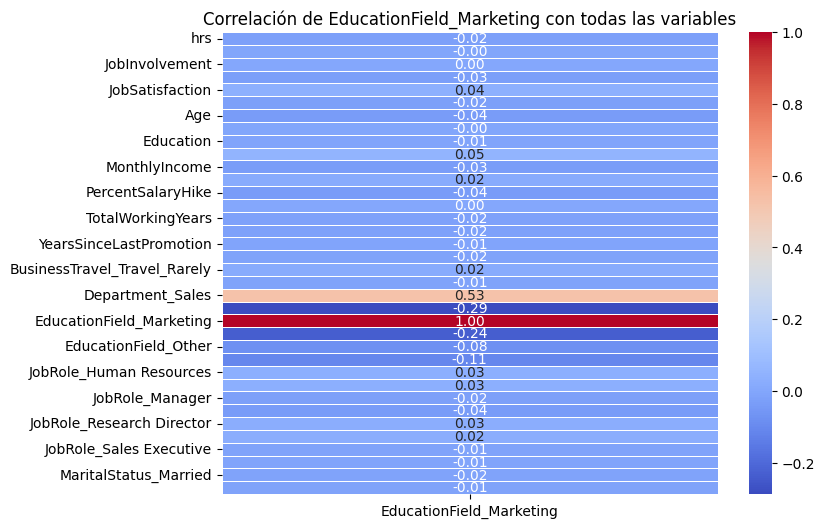

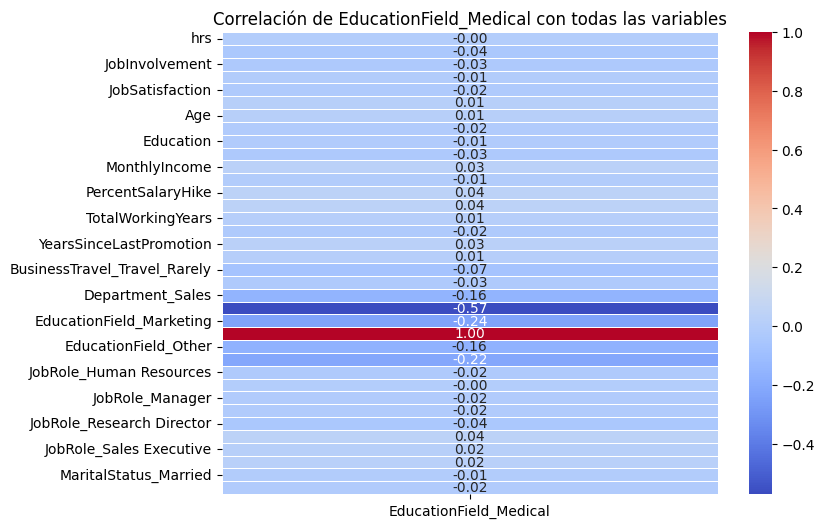

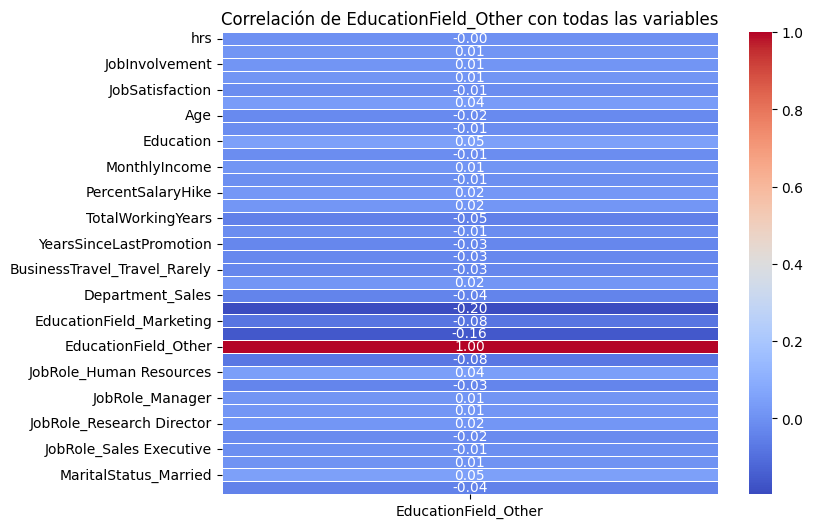

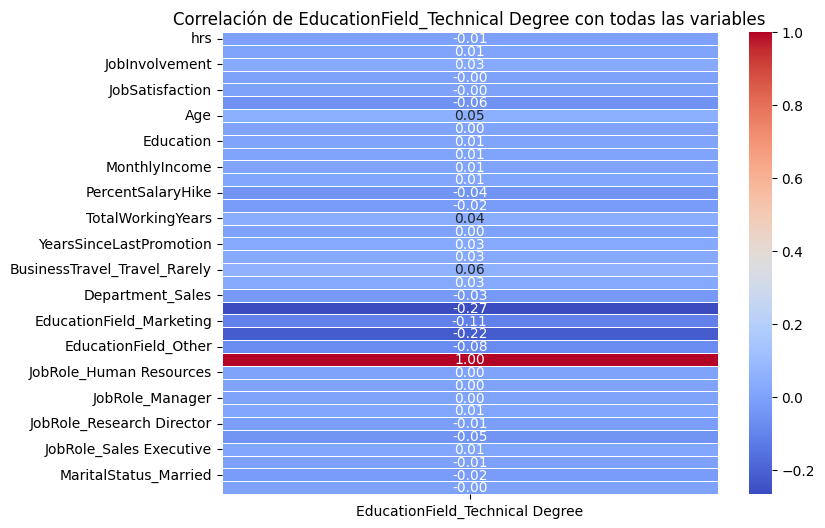

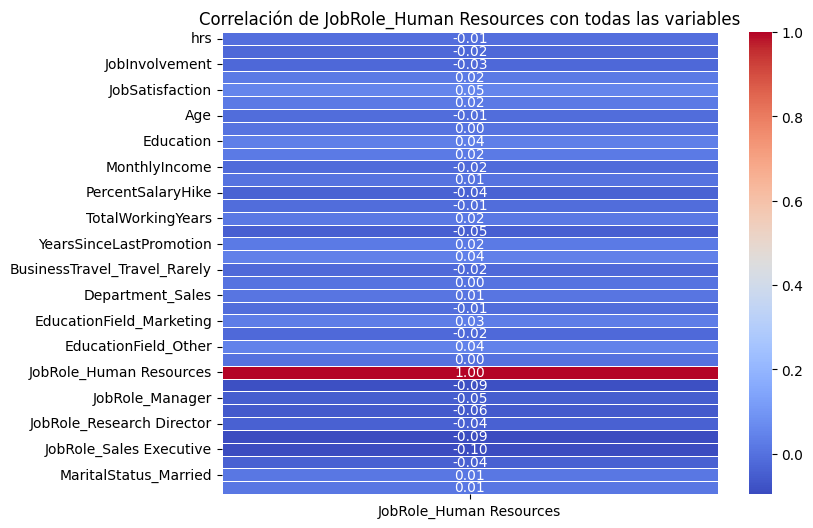

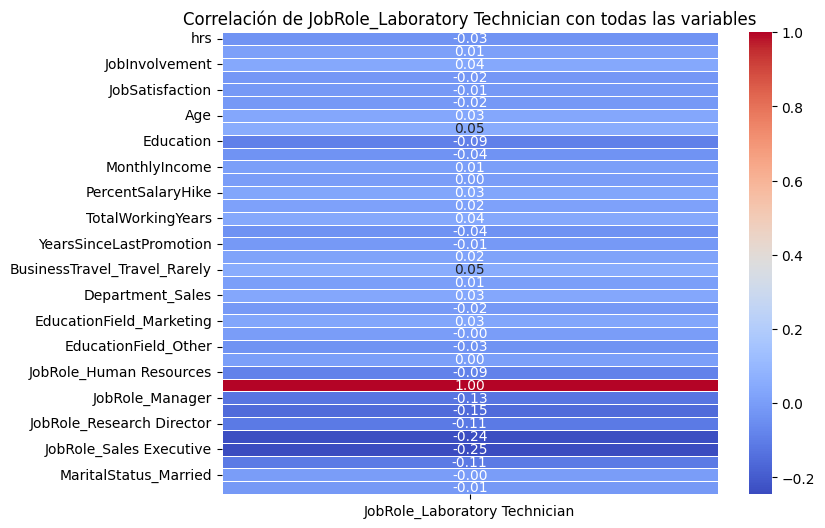

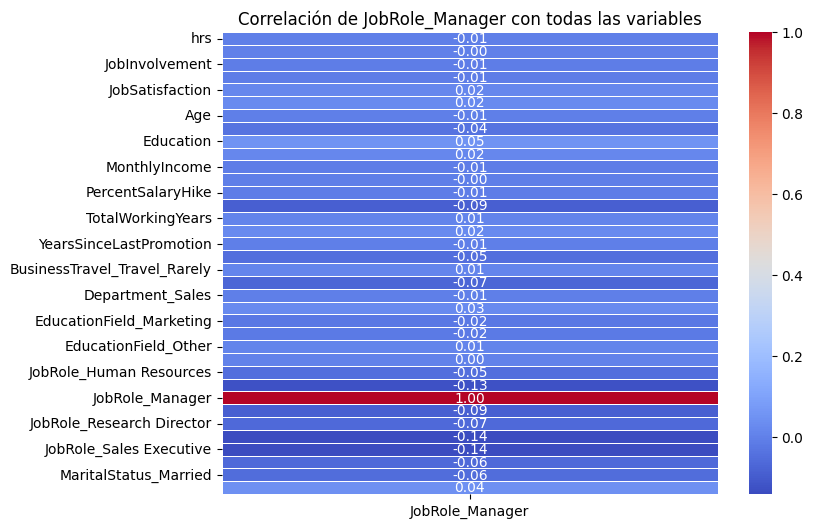

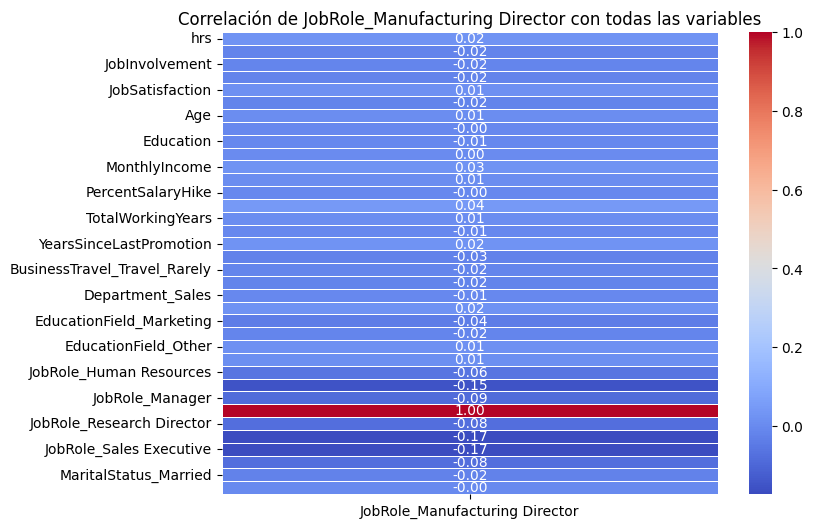

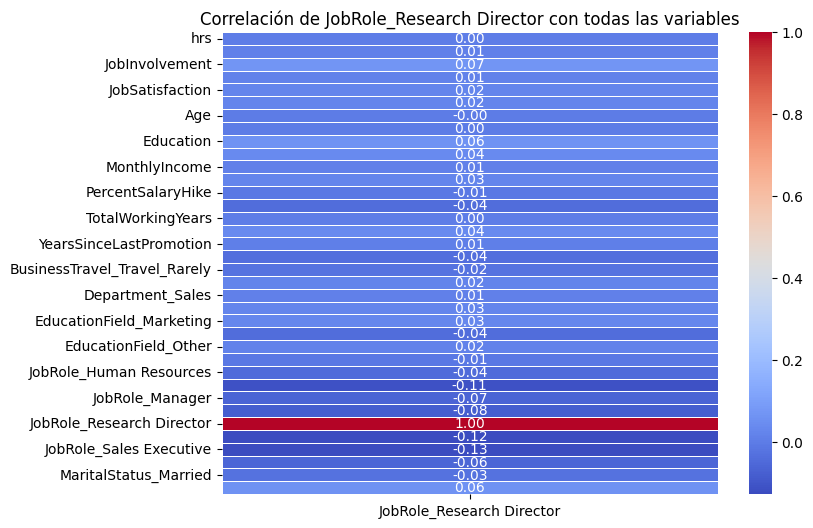

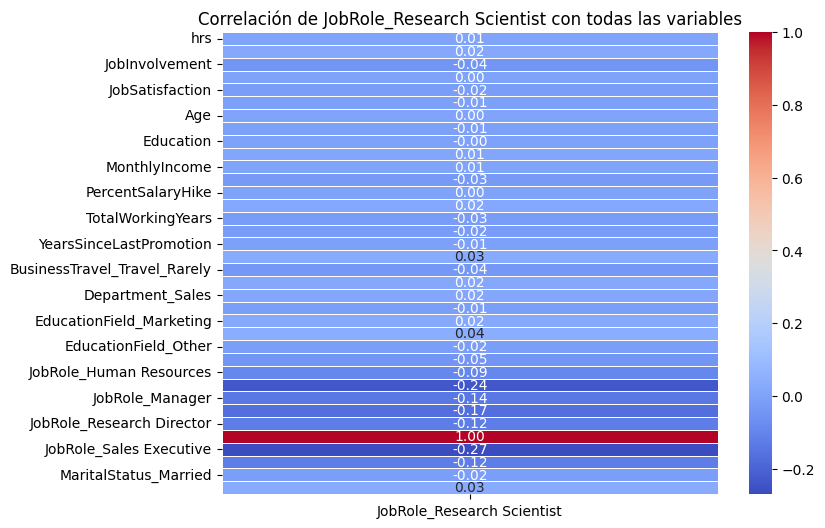

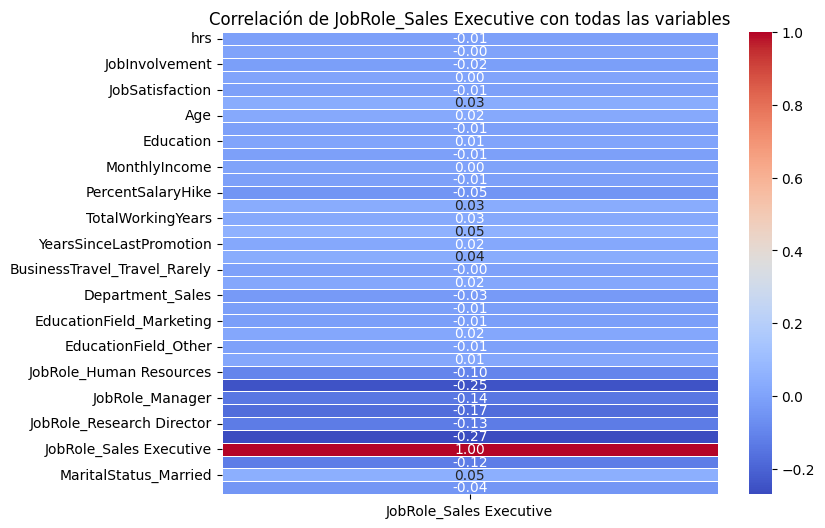

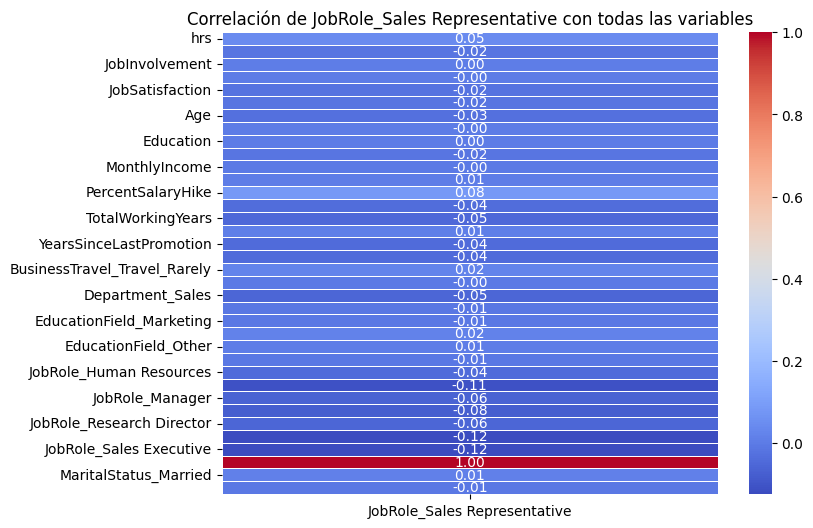

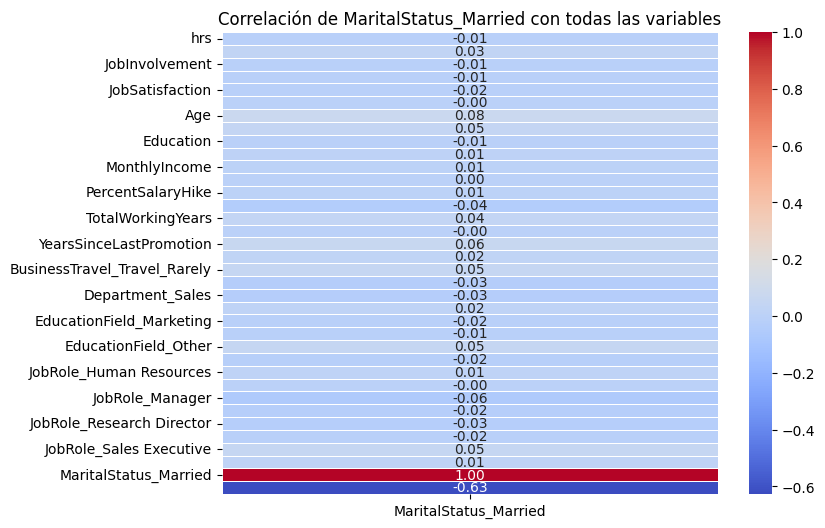

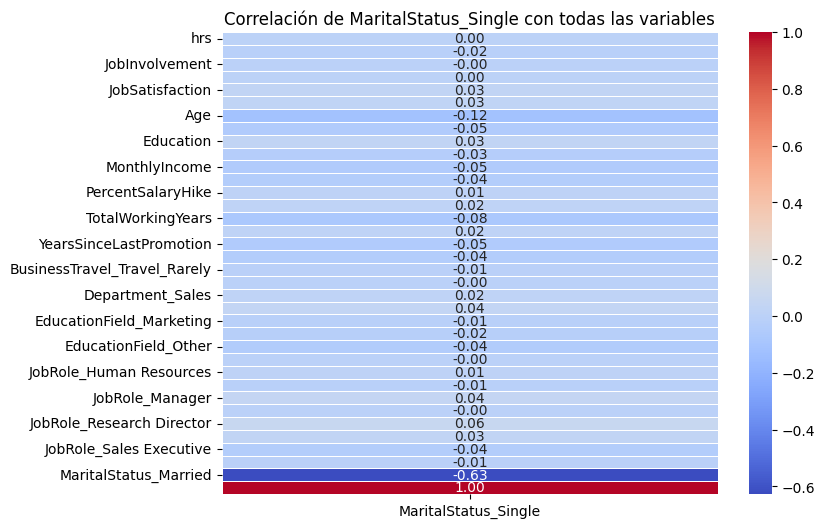

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Analizamos la correlación de las variables
corr_matrix = x.corr()

#Límite de correlación
threshold = 0.75

columns_to_drop = set()

#Chequeamos si existen dos variables muy correlacionadas
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.at[row, col]) > threshold and row != col and row not in columns_to_drop:
            columns_to_drop.add(col)
            print(f"Las Variables {col} y {row} están extremadamente correladas")

x= x.drop(columns=columns_to_drop)

print(f"Las columnas removidas por alta correlación (más de {threshold}) son:\n", columns_to_drop)
print(f"Numero de columnas: {x.shape[1]}")

print("\nCorrelación entre variables (Después de eliminar las más correladas):\n")
for col in x.corr().columns:
    plt.figure(figsize=(8, 6))
    sns.heatmap(x.corr()[[col]], annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f"Correlación de {col} con todas las variables")
    plt.show()


#### Información Mutua
Se debe realizar un análisis en el cuál veamos el grado de dependencia entre las variables y la variable respuesta "Attrition".

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x.select_dtypes(include=['number']), y)
mi_series = pd.Series(mi_scores, index=x.select_dtypes(include=['number']).columns)
mi_series.sort_values(ascending=False, inplace=True)

print("\nInformación Mutua:\n", mi_series)

columns_to_drop = set()

# Loop con las columnas y sus respectivos valores de información mutua
for col, mi in zip(x.columns, mi_scores):
    if mi == 0:
        columns_to_drop.add(col)

# Filtrar las columnas con información mutua diferente de cero
x = x.drop(columns = columns_to_drop)

# Imprimir las columnas eliminadas
print("Columnas eliminadas debido a información mutua cero:", columns_to_drop)
print(f"Numero de Columnas: {x.shape[1]}")



Información Mutua:
 MonthlyIncome                      0.112157
TotalWorkingYears                  0.031022
YearsWithCurrManager               0.027855
Age                                0.027449
NumCompaniesWorked                 0.025284
EnvironmentSatisfaction            0.019913
MaritalStatus_Single               0.016465
hrs                                0.015242
Education                          0.012580
YearsSinceLastPromotion            0.009628
JobInvolvement                     0.008411
JobRole_Sales Executive            0.007890
BusinessTravel_Travel_Rarely       0.005345
absences                           0.005171
EducationField_Other               0.001882
Department_Sales                   0.001431
WorkLifeBalance                    0.000453
JobRole_Human Resources            0.000000
MaritalStatus_Married              0.000000
JobRole_Sales Representative       0.000000
DistanceFromHome                   0.000000
JobRole_Research Scientist         0.000000
JobRole_Res

#### F-Score

Columnas elimnadas por un F-score menor a 5: Index(['NumCompaniesWorked', 'MonthlyIncome', 'YearsSinceLastPromotion',
       'Department_Sales', 'JobInvolvement', 'JobRole_Sales Executive',
       'EducationField_Other', 'Education'],
      dtype='object')
Numero de Columnas: 9


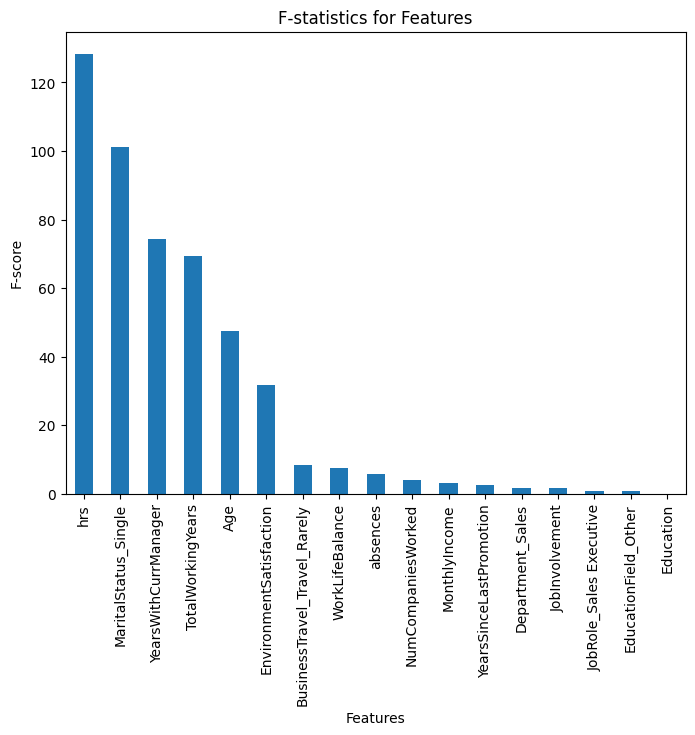

In [ ]:
from sklearn.feature_selection import f_classif

f_scores, _ = f_classif(x.select_dtypes(include=['number']), y)
f_series = pd.Series(f_scores, index=x.select_dtypes(include=['number']).columns)
f_series.sort_values(ascending=False, inplace=True)

columns_to_drop = f_series[f_series < 5].index

x = x.drop(columns=columns_to_drop)

print(f"Columnas elimnadas por un F-score menor a 5: {columns_to_drop}")
print(f"Numero de Columnas: {x.shape[1]}")

plt.figure(figsize=(8, 6))
f_series.plot(kind='bar')
plt.title("F-statistics for Features")
plt.ylabel("F-score")
plt.xlabel("Features")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

print("\nF-Score (ANOVA):\n", f_series)

# --- 4. Chi-Cuadrado (Para Variables Categóricas) ---
categorical_features = X.select_dtypes(include=['object']).columns

# Convertimos las variables categóricas a numéricas con One-Hot Encoding
X_cat = pd.get_dummies(X[categorical_features], drop_first=True)

# Escalar datos para chi2 (porque no admite valores negativos)
scaler = MinMaxScaler()
X_cat_scaled = scaler.fit_transform(X_cat)

chi_scores, _ = chi2(X_cat_scaled, y)
chi_series = pd.Series(chi_scores, index=X_cat.columns)
chi_series.sort_values(ascending=False, inplace=True)

print("\nChi-Cuadrado:\n", chi_series)



# Seleccionar las mejores variables según los métodos (umbral ajustable)
selected_features = list(mi_series[mi_series > 0.01].index) + \
                    list(f_series[f_series > 1.0].index) + \
                    list(chi_series[chi_series > 2.0].index)

selected_features = list(set(selected_features))  # Eliminar duplicados
print("\nVariables Seleccionadas:\n", selected_features)

X_selected = X[selected_features]  # Aplicar la selección de atributos



El siguiente paso es normalizar los valores, esto debido a que poseemos diferentes magnitudes entre las variables. Por ejemplo, la columna "Monthly Income" maneja valores de 6 o 7 digitos; mientras que "Education" tiene valores del 1 al 5. Para decidir qué método de normalización utilizar vamos a realizar una evaluación interna. También es importante resaltar que el problema está desbalanceado, por lo que tendremos que balancear los datos de cada división (train, validation y test).